In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
multi_act = pd.read_csv("ATUS DATA 03-19/atus_activity_0319.dat", 
                        dtype= {"TRCODEP": object, "TRTIER1P": object, "TRTIER2P": object}) #using 2003-2019 activity file
#multi_act

In [3]:
multi_resp = pd.read_csv("ATUS DATA 03-19/atus_resp_0319.dat")
#multi_resp

In [4]:
multi_merged = pd.merge(multi_act, multi_resp, on="TUCASEID")
multi_merged = multi_merged.filter(["TUCASEID","TUACTDUR24","TUCUMDUR","TRTIER1P","TRTIER2P","TRCODEP", 
                                    "TEWHERE","TELFS", "TUFNWGTP","TUSTARTTIM","TUSTOPTIME", "TUYEAR"])
#multi_merged

In [5]:
#TELFS = employment status 
multi_merged["TELFS"].unique()

array([2, 1, 4, 5, 3])

## Total Population  Population

In [6]:
#total_pops_codes = [3,4] # 3= total_pops - on layoff, 3 = total_pops - looking
#multi_merged = multi_merged[multi_merged["TELFS"].isin(total_pops_codes)]
#multi_merged["TELFS"].unique()

In [7]:
total_pops_2003 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_total_pops_weight = total_pops_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_total_pops_weight = atus_2003_total_pops_weight["TUFNWGTP"].sum()
atus_2003_total_pops_weight

82231180900.71338

## 2003-2019 Residential - Total Population

In [8]:
#only residential location from 2003-2019
residential_location = [-1,1,3]
atus_multi_yr_res_total_pops = multi_merged[multi_merged["TEWHERE"].isin(residential_location)]
#atus_multi_yr_res_total_pops

In [9]:
#atus residential year seperation by total_pops population 
atus_2003_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_res_total_pops = atus_multi_yr_res_total_pops[atus_multi_yr_res_total_pops["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_res_total_pops

### 2003 All Residential Activities -Total Population

In [10]:
atus_2003_all_res_total_pops = atus_2003_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_res_total_pops

In [11]:
atus_2003_all_res_total_pops_merge = pd.merge(atus_2003_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_total_pops_merge

In [12]:
atus_2003_all_res_total_pops_merge["Multiplied Weight"] = atus_2003_all_res_total_pops_merge["TUACTDUR24"] * atus_2003_all_res_total_pops_merge["TUFNWGTP"]
#atus_2003_all_res_total_pops_merge

In [13]:
atus_2003_all_res_total_pops_multiplied_weight = atus_2003_all_res_total_pops_merge["Multiplied Weight"].sum()
atus_2003_all_res_total_pops_multiplied_weight

85443505672905.53

In [14]:
total_pops_2003 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_total_pops_weight = total_pops_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_total_pops_weight = atus_2003_total_pops_weight["TUFNWGTP"].sum()
atus_2003_total_pops_weight

82231180900.71338

In [15]:
all_act_2003_res_total_pops_hpd = atus_2003_all_res_total_pops_multiplied_weight / atus_2003_total_pops_weight / 60
all_act_2003_res_total_pops_hpd

17.317742640728692

### 2004 All Residential Activities - Total Population

In [16]:
atus_2004_all_res_total_pops = atus_2004_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_res_total_pops

In [17]:
atus_2004_all_res_total_pops_merge = pd.merge(atus_2004_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2004_all_res_total_pops_merge["Multiplied Weight"] = atus_2004_all_res_total_pops_merge["TUACTDUR24"] * atus_2004_all_res_total_pops_merge["TUFNWGTP"]
#atus_2004_all_res_total_pops_merge

In [18]:
total_pops_2004 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2004")]
atus_2004_total_pops_weight = total_pops_2004.drop_duplicates(subset=["TUCASEID"])
atus_2004_total_pops_weight = atus_2004_total_pops_weight["TUFNWGTP"].sum()

atus_2004_all_res_total_pops_multiplied_weight = atus_2004_all_res_total_pops_merge["Multiplied Weight"].sum()

In [19]:
all_act_2004_res_total_pops_hpd = atus_2004_all_res_total_pops_multiplied_weight / atus_2004_total_pops_weight / 60
all_act_2004_res_total_pops_hpd

17.355506174426807

### 2005 All Residential Activities - Total Population

In [20]:
atus_2005_all_res_total_pops = atus_2005_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_res_total_pops

In [21]:
atus_2005_all_res_total_pops_merge = pd.merge(atus_2005_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2005_all_res_total_pops_merge["Multiplied Weight"] = atus_2005_all_res_total_pops_merge["TUACTDUR24"] * atus_2005_all_res_total_pops_merge["TUFNWGTP"]
#atus_2005_all_res_total_pops_merge

In [22]:
total_pops_2005 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2005")]
atus_2005_total_pops_weight = total_pops_2005.drop_duplicates(subset=["TUCASEID"])
atus_2005_total_pops_weight = atus_2005_total_pops_weight["TUFNWGTP"].sum()

atus_2005_all_res_total_pops_multiplied_weight = atus_2005_all_res_total_pops_merge["Multiplied Weight"].sum()

In [23]:
all_act_2005_res_total_pops_hpd = atus_2005_all_res_total_pops_multiplied_weight / atus_2005_total_pops_weight / 60
all_act_2005_res_total_pops_hpd

17.36391366798122

### 2006 All Residential Activities - Total Population

In [24]:
atus_2006_all_res_total_pops = atus_2006_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_res_total_pops

In [25]:
atus_2006_all_res_total_pops_merge = pd.merge(atus_2006_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2006_all_res_total_pops_merge["Multiplied Weight"] = atus_2006_all_res_total_pops_merge["TUACTDUR24"] * atus_2006_all_res_total_pops_merge["TUFNWGTP"]
#atus_2006_all_res_total_pops_merge

In [26]:
total_pops_2006 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2006")]
atus_2006_total_pops_weight = total_pops_2006.drop_duplicates(subset=["TUCASEID"])
atus_2006_total_pops_weight = atus_2006_total_pops_weight["TUFNWGTP"].sum()

atus_2006_all_res_total_pops_multiplied_weight = atus_2006_all_res_total_pops_merge["Multiplied Weight"].sum()

In [27]:
all_act_2006_res_total_pops_hpd = atus_2006_all_res_total_pops_multiplied_weight / atus_2006_total_pops_weight / 60
all_act_2006_res_total_pops_hpd

17.29335670843908

### 2007 All Residential Activities - Total Population

In [28]:
atus_2007_all_res_total_pops = atus_2007_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_res_total_pops

In [29]:
atus_2007_all_res_total_pops_merge = pd.merge(atus_2007_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2007_all_res_total_pops_merge["Multiplied Weight"] = atus_2007_all_res_total_pops_merge["TUACTDUR24"] * atus_2007_all_res_total_pops_merge["TUFNWGTP"]
#atus_2007_all_res_total_pops_merge

In [30]:
total_pops_2007 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2007")]
atus_2007_total_pops_weight = total_pops_2007.drop_duplicates(subset=["TUCASEID"])
atus_2007_total_pops_weight = atus_2007_total_pops_weight["TUFNWGTP"].sum()

atus_2007_all_res_total_pops_multiplied_weight = atus_2007_all_res_total_pops_merge["Multiplied Weight"].sum()

In [31]:
all_act_2007_res_total_pops_hpd = atus_2007_all_res_total_pops_multiplied_weight / atus_2007_total_pops_weight / 60
all_act_2007_res_total_pops_hpd

17.297802835592172

### 2008 All Residential Activities - Total Population

In [32]:
atus_2008_all_res_total_pops = atus_2008_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_res_total_pops

In [33]:
atus_2008_all_res_total_pops_merge = pd.merge(atus_2008_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2008_all_res_total_pops_merge["Multiplied Weight"] = atus_2008_all_res_total_pops_merge["TUACTDUR24"] * atus_2008_all_res_total_pops_merge["TUFNWGTP"]
#atus_2008_all_res_total_pops_merge

In [34]:
total_pops_2008 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2008")]
atus_2008_total_pops_weight = total_pops_2008.drop_duplicates(subset=["TUCASEID"])
atus_2008_total_pops_weight = atus_2008_total_pops_weight["TUFNWGTP"].sum()

atus_2008_all_res_total_pops_multiplied_weight = atus_2008_all_res_total_pops_merge["Multiplied Weight"].sum()

In [35]:
all_act_2008_res_total_pops_hpd = atus_2008_all_res_total_pops_multiplied_weight / atus_2008_total_pops_weight / 60
all_act_2008_res_total_pops_hpd

17.485108356944156

### 2009 All Residential Activities -Total Population

In [36]:
atus_2009_all_res_total_pops = atus_2009_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_res_total_pops

In [37]:
atus_2009_all_res_total_pops_merge = pd.merge(atus_2009_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2009_all_res_total_pops_merge["Multiplied Weight"] = atus_2009_all_res_total_pops_merge["TUACTDUR24"] * atus_2009_all_res_total_pops_merge["TUFNWGTP"]
#atus_2009_all_res_total_pops_merge

In [38]:
total_pops_2009 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2009")]
atus_2009_total_pops_weight = total_pops_2009.drop_duplicates(subset=["TUCASEID"])
atus_2009_total_pops_weight = atus_2009_total_pops_weight["TUFNWGTP"].sum()

atus_2009_all_res_total_pops_multiplied_weight = atus_2009_all_res_total_pops_merge["Multiplied Weight"].sum()

In [39]:
all_act_2009_res_total_pops_hpd = atus_2009_all_res_total_pops_multiplied_weight / atus_2009_total_pops_weight / 60
all_act_2009_res_total_pops_hpd

17.705195287146005

### 2010 All Residential Activities - Total Population

In [40]:
atus_2010_all_res_total_pops = atus_2010_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_res_total_pops

In [41]:
atus_2010_all_res_total_pops_merge = pd.merge(atus_2010_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2010_all_res_total_pops_merge["Multiplied Weight"] = atus_2010_all_res_total_pops_merge["TUACTDUR24"] * atus_2010_all_res_total_pops_merge["TUFNWGTP"]
#atus_2010_all_res_total_pops_merge

In [42]:
total_pops_2010 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2010")]
atus_2010_total_pops_weight = total_pops_2010.drop_duplicates(subset=["TUCASEID"])
atus_2010_total_pops_weight = atus_2010_total_pops_weight["TUFNWGTP"].sum()

atus_2010_all_res_total_pops_multiplied_weight = atus_2010_all_res_total_pops_merge["Multiplied Weight"].sum()

In [43]:
all_act_2010_res_total_pops_hpd = atus_2010_all_res_total_pops_multiplied_weight / atus_2010_total_pops_weight / 60
all_act_2010_res_total_pops_hpd

17.687538121810938

### 2011 All Residential Activities - Total Population

In [44]:
atus_2011_all_res_total_pops = atus_2011_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_res_total_pops

In [45]:
atus_2011_all_res_total_pops_merge = pd.merge(atus_2011_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_total_pops_merge["Multiplied Weight"] = atus_2011_all_res_total_pops_merge["TUACTDUR24"] * atus_2011_all_res_total_pops_merge["TUFNWGTP"]
#atus_2011_all_res_total_pops_merge

In [46]:
atus_2011_all_res_total_pops_merge = pd.merge(atus_2011_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_total_pops_merge["Multiplied Weight"] = atus_2011_all_res_total_pops_merge["TUACTDUR24"] * atus_2011_all_res_total_pops_merge["TUFNWGTP"]
#atus_2011_all_res_total_pops_merge

In [47]:
total_pops_2011 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2011")]
atus_2011_total_pops_weight = total_pops_2011.drop_duplicates(subset=["TUCASEID"])
atus_2011_total_pops_weight = atus_2011_total_pops_weight["TUFNWGTP"].sum()

atus_2011_all_res_total_pops_multiplied_weight = atus_2011_all_res_total_pops_merge["Multiplied Weight"].sum()

In [48]:
all_act_2011_res_total_pops_hpd = atus_2011_all_res_total_pops_multiplied_weight / atus_2011_total_pops_weight / 60
all_act_2011_res_total_pops_hpd

17.62568833008119

### 2012 All Residential Activities - Total Population

In [49]:
atus_2012_all_res_total_pops = atus_2012_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_res_total_pops

In [50]:
atus_2012_all_res_total_pops_merge = pd.merge(atus_2012_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_total_pops_merge["Multiplied Weight"] = atus_2012_all_res_total_pops_merge["TUACTDUR24"] * atus_2012_all_res_total_pops_merge["TUFNWGTP"]
#atus_2012_all_res_total_pops_merge

In [51]:
atus_2012_all_res_total_pops_merge = pd.merge(atus_2012_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_total_pops_merge["Multiplied Weight"] = atus_2012_all_res_total_pops_merge["TUACTDUR24"] * atus_2012_all_res_total_pops_merge["TUFNWGTP"]
#atus_2012_all_res_total_pops_merge

In [52]:
total_pops_2012 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2012")]
atus_2012_total_pops_weight = total_pops_2012.drop_duplicates(subset=["TUCASEID"])
atus_2012_total_pops_weight = atus_2012_total_pops_weight["TUFNWGTP"].sum()

atus_2012_all_res_total_pops_multiplied_weight = atus_2012_all_res_total_pops_merge["Multiplied Weight"].sum()

In [53]:
all_act_2012_res_total_pops_hpd = atus_2012_all_res_total_pops_multiplied_weight / atus_2012_total_pops_weight / 60
all_act_2012_res_total_pops_hpd

17.70959977701091

### 2013 All Residential Activities - Total Population

In [54]:
atus_2013_all_res_total_pops = atus_2013_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_res_total_pops

In [55]:
atus_2013_all_res_total_pops_merge = pd.merge(atus_2013_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_total_pops_merge["Multiplied Weight"] = atus_2013_all_res_total_pops_merge["TUACTDUR24"] * atus_2013_all_res_total_pops_merge["TUFNWGTP"]
#atus_2013_all_res_total_pops_merge

In [56]:
atus_2013_all_res_total_pops_merge = pd.merge(atus_2013_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_total_pops_merge["Multiplied Weight"] = atus_2013_all_res_total_pops_merge["TUACTDUR24"] * atus_2013_all_res_total_pops_merge["TUFNWGTP"]
#atus_2013_all_res_total_pops_merge

In [57]:
total_pops_2013 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2013")]
atus_2013_total_pops_weight = total_pops_2013.drop_duplicates(subset=["TUCASEID"])
atus_2013_total_pops_weight = atus_2013_total_pops_weight["TUFNWGTP"].sum()

atus_2013_all_res_total_pops_multiplied_weight = atus_2013_all_res_total_pops_merge["Multiplied Weight"].sum()

In [58]:
all_act_2013_res_total_pops_hpd = atus_2013_all_res_total_pops_multiplied_weight / atus_2013_total_pops_weight / 60
all_act_2013_res_total_pops_hpd

17.752395284957853

### 2014 All Residential Activities - Total Population

In [59]:
atus_2014_all_res_total_pops = atus_2014_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_res_total_pops

In [60]:
atus_2014_all_res_total_pops_merge = pd.merge(atus_2014_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_total_pops_merge["Multiplied Weight"] = atus_2014_all_res_total_pops_merge["TUACTDUR24"] * atus_2014_all_res_total_pops_merge["TUFNWGTP"]
#atus_2014_all_res_total_pops_merge

In [61]:
atus_2014_all_res_total_pops_merge = pd.merge(atus_2014_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_total_pops_merge["Multiplied Weight"] = atus_2014_all_res_total_pops_merge["TUACTDUR24"] * atus_2014_all_res_total_pops_merge["TUFNWGTP"]
#atus_2014_all_res_total_pops_merge

In [62]:
total_pops_2014 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2014")]
atus_2014_total_pops_weight = total_pops_2014.drop_duplicates(subset=["TUCASEID"])
atus_2014_total_pops_weight = atus_2014_total_pops_weight["TUFNWGTP"].sum()

atus_2014_all_res_total_pops_multiplied_weight = atus_2014_all_res_total_pops_merge["Multiplied Weight"].sum()

In [63]:
all_act_2014_res_total_pops_hpd = atus_2014_all_res_total_pops_multiplied_weight / atus_2014_total_pops_weight / 60
all_act_2014_res_total_pops_hpd

17.757475585701304

### 2015 All Residential Activities - Total Population

In [64]:
atus_2015_all_res_total_pops = atus_2015_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_res_total_pops

In [65]:
atus_2015_all_res_total_pops_merge = pd.merge(atus_2015_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_total_pops_merge["Multiplied Weight"] = atus_2015_all_res_total_pops_merge["TUACTDUR24"] * atus_2015_all_res_total_pops_merge["TUFNWGTP"]
#atus_2015_all_res_total_pops_merge

In [66]:
atus_2015_all_res_total_pops_merge = pd.merge(atus_2015_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_total_pops_merge["Multiplied Weight"] = atus_2015_all_res_total_pops_merge["TUACTDUR24"] * atus_2015_all_res_total_pops_merge["TUFNWGTP"]
#atus_2015_all_res_total_pops_merge

In [67]:
total_pops_2015 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2015")]
atus_2015_total_pops_weight = total_pops_2015.drop_duplicates(subset=["TUCASEID"])
atus_2015_total_pops_weight = atus_2015_total_pops_weight["TUFNWGTP"].sum()

atus_2015_all_res_total_pops_multiplied_weight = atus_2015_all_res_total_pops_merge["Multiplied Weight"].sum()

In [68]:
all_act_2015_res_total_pops_hpd = atus_2015_all_res_total_pops_multiplied_weight / atus_2015_total_pops_weight / 60
all_act_2015_res_total_pops_hpd

17.817960989520426

### 2016 All Residential Activities - Total Population

In [69]:
atus_2016_all_res_total_pops = atus_2016_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_res_total_pops

In [70]:
atus_2016_all_res_total_pops_merge = pd.merge(atus_2016_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_total_pops_merge["Multiplied Weight"] = atus_2016_all_res_total_pops_merge["TUACTDUR24"] * atus_2016_all_res_total_pops_merge["TUFNWGTP"]
#atus_2016_all_res_total_pops_merge

In [71]:
atus_2016_all_res_total_pops_merge = pd.merge(atus_2016_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_total_pops_merge["Multiplied Weight"] = atus_2016_all_res_total_pops_merge["TUACTDUR24"] * atus_2016_all_res_total_pops_merge["TUFNWGTP"]
#atus_2016_all_res_total_pops_merge

In [72]:
total_pops_2016 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2016")]
atus_2016_total_pops_weight = total_pops_2016.drop_duplicates(subset=["TUCASEID"])
atus_2016_total_pops_weight = atus_2016_total_pops_weight["TUFNWGTP"].sum()

atus_2016_all_res_total_pops_multiplied_weight = atus_2016_all_res_total_pops_merge["Multiplied Weight"].sum()

In [73]:
all_act_2016_res_total_pops_hpd = atus_2016_all_res_total_pops_multiplied_weight / atus_2016_total_pops_weight / 60
all_act_2016_res_total_pops_hpd

17.629279087740155

### 2017 All Residential Activities - Total Population

In [74]:
atus_2017_all_res_total_pops = atus_2017_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_res_total_pops

In [75]:
atus_2017_all_res_total_pops_merge = pd.merge(atus_2017_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_total_pops_merge["Multiplied Weight"] = atus_2017_all_res_total_pops_merge["TUACTDUR24"] * atus_2017_all_res_total_pops_merge["TUFNWGTP"]
#atus_2017_all_res_total_pops_merge

In [76]:
atus_2017_all_res_total_pops_merge = pd.merge(atus_2017_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_total_pops_merge["Multiplied Weight"] = atus_2017_all_res_total_pops_merge["TUACTDUR24"] * atus_2017_all_res_total_pops_merge["TUFNWGTP"]
#atus_2017_all_res_total_pops_merge

In [77]:
total_pops_2017 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2017")]
atus_2017_total_pops_weight = total_pops_2017.drop_duplicates(subset=["TUCASEID"])
atus_2017_total_pops_weight = atus_2017_total_pops_weight["TUFNWGTP"].sum()

atus_2017_all_res_total_pops_multiplied_weight = atus_2017_all_res_total_pops_merge["Multiplied Weight"].sum()

In [78]:
all_act_2017_res_total_pops_hpd = atus_2017_all_res_total_pops_multiplied_weight / atus_2017_total_pops_weight / 60
all_act_2017_res_total_pops_hpd

17.70734994338697

### 2018 All Residential Activities - Total Population

In [79]:
atus_2018_all_res_total_pops = atus_2018_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_res_total_pops

In [80]:
atus_2018_all_res_total_pops_merge = pd.merge(atus_2018_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_total_pops_merge["Multiplied Weight"] = atus_2018_all_res_total_pops_merge["TUACTDUR24"] * atus_2018_all_res_total_pops_merge["TUFNWGTP"]
#atus_2018_all_res_total_pops_merge

In [81]:
atus_2018_all_res_total_pops_merge = pd.merge(atus_2018_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_total_pops_merge["Multiplied Weight"] = atus_2018_all_res_total_pops_merge["TUACTDUR24"] * atus_2018_all_res_total_pops_merge["TUFNWGTP"]
#atus_2018_all_res_total_pops_merge

In [82]:
total_pops_2018 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2018")]
atus_2018_total_pops_weight = total_pops_2018.drop_duplicates(subset=["TUCASEID"])
atus_2018_total_pops_weight = atus_2018_total_pops_weight["TUFNWGTP"].sum()

atus_2018_all_res_total_pops_multiplied_weight = atus_2018_all_res_total_pops_merge["Multiplied Weight"].sum()

In [83]:
all_act_2018_res_total_pops_hpd = atus_2018_all_res_total_pops_multiplied_weight / atus_2018_total_pops_weight / 60
all_act_2018_res_total_pops_hpd

17.72399163726947

### 2019 All Residential Activities - Total Population

In [84]:
atus_2019_all_res_total_pops = atus_2019_res_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_res_total_pops

In [85]:
atus_2019_all_res_total_pops_merge = pd.merge(atus_2019_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_total_pops_merge["Multiplied Weight"] = atus_2019_all_res_total_pops_merge["TUACTDUR24"] * atus_2019_all_res_total_pops_merge["TUFNWGTP"]
#atus_2019_all_res_total_pops_merge

In [86]:
atus_2019_all_res_total_pops_merge = pd.merge(atus_2019_all_res_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_total_pops_merge["Multiplied Weight"] = atus_2019_all_res_total_pops_merge["TUACTDUR24"] * atus_2019_all_res_total_pops_merge["TUFNWGTP"]
#atus_2019_all_res_total_pops_merge

In [87]:
total_pops_2019 = multi_merged[multi_merged["TUCASEID"].apply(str).str.startswith("2019")]
atus_2019_total_pops_weight = total_pops_2019.drop_duplicates(subset=["TUCASEID"])
atus_2019_total_pops_weight = atus_2019_total_pops_weight["TUFNWGTP"].sum()

atus_2019_all_res_total_pops_multiplied_weight = atus_2019_all_res_total_pops_merge["Multiplied Weight"].sum()

In [88]:
all_act_2019_res_total_pops_hpd = atus_2019_all_res_total_pops_multiplied_weight / atus_2019_total_pops_weight / 60
all_act_2019_res_total_pops_hpd

17.763810283202467

### Regresssion: All Residential Activity - Total Population

#### 2003 -2012 Regression 

In [89]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_total_pops_hpd, all_act_2004_res_total_pops_hpd, all_act_2005_res_total_pops_hpd,
                                   all_act_2006_res_total_pops_hpd, all_act_2007_res_total_pops_hpd, all_act_2008_res_total_pops_hpd,
                                   all_act_2009_res_total_pops_hpd, all_act_2010_res_total_pops_hpd, all_act_2011_res_total_pops_hpd,
                                   all_act_2012_res_total_pops_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

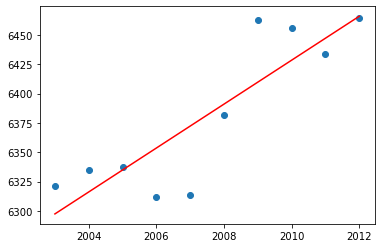

In [90]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [91]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.7453365134405741

In [92]:
all_act_2012_res_total_pops_slope = model.coef_
all_act_2012_res_total_pops_slope

array([[18.71218477]])

#### 2003-2019 Regression

In [93]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_total_pops_hpd, all_act_2004_res_total_pops_hpd, all_act_2005_res_total_pops_hpd,
                                   all_act_2006_res_total_pops_hpd, all_act_2007_res_total_pops_hpd, all_act_2008_res_total_pops_hpd,
                                   all_act_2009_res_total_pops_hpd, all_act_2010_res_total_pops_hpd, all_act_2011_res_total_pops_hpd,
                                   all_act_2012_res_total_pops_hpd, all_act_2013_res_total_pops_hpd, all_act_2014_res_total_pops_hpd,
                                   all_act_2015_res_total_pops_hpd, all_act_2016_res_total_pops_hpd, all_act_2017_res_total_pops_hpd,
                                   all_act_2018_res_total_pops_hpd, all_act_2019_res_total_pops_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

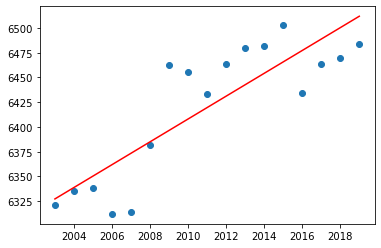

In [94]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [95]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.712378702578844

In [96]:
all_act_2019_res_total_pops_slope = model.coef_
all_act_2019_res_total_pops_slope

array([[11.54255682]])

### 2003-2019 NonResidential - Total Population

In [97]:
#non-residential = 2,4,5,6,7,8,9,10,11,30,31,32

In [98]:
nonresidential_location = [2,4,5,6,7,8,9,10,11,30,31,32]
atus_multi_yr_nonres_total_pops = multi_merged[multi_merged["TEWHERE"].isin(nonresidential_location)]
#atus_multi_yr_res_total_pops

In [99]:
atus_2003_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_nonres_total_pops = atus_multi_yr_nonres_total_pops[atus_multi_yr_nonres_total_pops["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_nonres_total_pops

### 2003 All Activities - NonResidential - Total Population

In [100]:
atus_2003_all_nonres_total_pops = atus_2003_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_nonres_total_pops

In [101]:
atus_2003_all_nonres_total_pops_merge = pd.merge(atus_2003_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_total_pops_merge

In [102]:
atus_2003_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2003_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2003_all_nonres_total_pops_merge["TUFNWGTP"]
#atus_2003_all_nonres_total_pops_merge

In [103]:
atus_2003_all_nonres_total_pops_multiplied_weight = atus_2003_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2003_all_nonres_total_pops_multiplied_weight

26450159437926.35

In [104]:
all_act_2003_nonres_total_pops_hpd = atus_2003_all_nonres_total_pops_multiplied_weight / atus_2003_total_pops_weight / 60
all_act_2003_nonres_total_pops_hpd

5.360934694156648

### 2004 All Activities - NonResidential - Total Population

In [105]:
atus_2004_all_nonres_total_pops = atus_2004_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_nonres_total_pops

In [106]:
atus_2004_all_nonres_total_pops_merge = pd.merge(atus_2004_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_all_res_total_pops_merge

In [107]:
atus_2004_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2004_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2004_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2004_all_nonres_total_pops_multiplied_weight = atus_2004_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2004_all_nonres_total_pops_multiplied_weight

26838862143575.75

In [108]:
all_act_2004_nonres_total_pops_hpd = atus_2004_all_nonres_total_pops_multiplied_weight / atus_2004_total_pops_weight / 60
all_act_2004_nonres_total_pops_hpd

5.372610012255234

### 2005 All Activities - NonResidential - total_pops

In [109]:
atus_2005_all_nonres_total_pops = atus_2005_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_nonres_total_pops

In [110]:
atus_2005_all_nonres_total_pops_merge = pd.merge(atus_2005_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_all_res_total_pops_merge

In [111]:
atus_2005_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2005_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2005_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2005_all_nonres_total_pops_multiplied_weight = atus_2005_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2005_all_nonres_total_pops_multiplied_weight

27093291857795.09

In [112]:
all_act_2005_nonres_total_pops_hpd = atus_2005_all_nonres_total_pops_multiplied_weight / atus_2005_total_pops_weight / 60
all_act_2005_nonres_total_pops_hpd

5.368876151085315

### 2006 All Activities - NonResidential - total_pops

In [113]:
atus_2006_all_nonres_total_pops = atus_2006_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_nonres_total_pops

In [114]:
atus_2006_all_nonres_total_pops_merge = pd.merge(atus_2006_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_all_res_total_pops_merge

In [115]:
atus_2006_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2006_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2006_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2006_all_nonres_total_pops_multiplied_weight = atus_2006_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2006_all_nonres_total_pops_multiplied_weight

27841461976797.637

In [116]:
all_act_2006_nonres_total_pops_hpd = atus_2006_all_nonres_total_pops_multiplied_weight / atus_2006_total_pops_weight / 60
all_act_2006_nonres_total_pops_hpd

5.4533568284283644

### 2007 All Activities - NonResidential - total_pops

In [117]:
atus_2007_all_nonres_total_pops = atus_2007_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_nonres_total_pops

In [118]:
atus_2007_all_nonres_total_pops_merge = pd.merge(atus_2007_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_all_res_total_pops_merge

In [119]:
atus_2007_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2007_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2007_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2007_all_nonres_total_pops_multiplied_weight = atus_2007_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2007_all_nonres_total_pops_multiplied_weight

28261373260358.223

In [120]:
all_act_2007_nonres_total_pops_hpd = atus_2007_all_nonres_total_pops_multiplied_weight / atus_2007_total_pops_weight / 60
all_act_2007_nonres_total_pops_hpd

5.465658810020766

### 2008 All Activities - NonResidential - total_pops

In [121]:
atus_2008_all_nonres_total_pops = atus_2008_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_nonres_total_pops

In [122]:
atus_2008_all_nonres_total_pops_merge = pd.merge(atus_2008_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_all_res_total_pops_merge

In [123]:
atus_2008_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2008_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2008_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2008_all_nonres_total_pops_multiplied_weight = atus_2008_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2008_all_nonres_total_pops_multiplied_weight

27598873324875.33

In [124]:
all_act_2008_nonres_total_pops_hpd = atus_2008_all_nonres_total_pops_multiplied_weight / atus_2008_total_pops_weight / 60
all_act_2008_nonres_total_pops_hpd

5.280427353340347

### 2009 All Activities - NonResidential - total_pops

In [125]:
atus_2009_all_nonres_total_pops = atus_2009_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_nonres_total_pops

In [126]:
atus_2009_all_nonres_total_pops_merge = pd.merge(atus_2009_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_all_res_total_pops_merge

In [127]:
atus_2009_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2009_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2009_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2009_all_nonres_total_pops_multiplied_weight = atus_2009_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2009_all_nonres_total_pops_multiplied_weight

26652605400275.004

In [128]:
all_act_2009_nonres_total_pops_hpd = atus_2009_all_nonres_total_pops_multiplied_weight / atus_2009_total_pops_weight / 60
all_act_2009_nonres_total_pops_hpd

5.0730434707236

### 2010 All Activities - NonResidential - total_pops

In [129]:
atus_2010_all_nonres_total_pops = atus_2010_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_nonres_total_pops

In [130]:
atus_2010_all_nonres_total_pops_merge = pd.merge(atus_2010_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_all_res_total_pops_merge

In [131]:
atus_2010_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2010_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2010_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2010_all_nonres_total_pops_multiplied_weight = atus_2010_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2010_all_nonres_total_pops_multiplied_weight

26839915412649.176

In [132]:
all_act_2010_nonres_total_pops_hpd = atus_2010_all_nonres_total_pops_multiplied_weight / atus_2010_total_pops_weight / 60
all_act_2010_nonres_total_pops_hpd

5.066137330385002

### 2011 All Activities - NonResidential - total_pops

In [133]:
atus_2011_all_nonres_total_pops = atus_2011_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_nonres_total_pops

In [134]:
atus_2011_all_nonres_total_pops_merge = pd.merge(atus_2011_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_all_res_total_pops_merge

In [135]:
atus_2011_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2011_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2011_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2011_all_nonres_total_pops_multiplied_weight = atus_2011_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2011_all_nonres_total_pops_multiplied_weight

27402530486348.934

In [136]:
all_act_2011_nonres_total_pops_hpd = atus_2011_all_nonres_total_pops_multiplied_weight / atus_2011_total_pops_weight / 60
all_act_2011_nonres_total_pops_hpd

5.135443961335683

### 2012 All Activities - NonResidential - total_pops

In [137]:
atus_2012_all_nonres_total_pops = atus_2012_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_nonres_total_pops

In [138]:
atus_2012_all_nonres_total_pops_merge = pd.merge(atus_2012_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_all_res_total_pops_merge

In [139]:
atus_2012_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2012_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2012_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2012_all_nonres_total_pops_multiplied_weight = atus_2012_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2012_all_nonres_total_pops_multiplied_weight

27459656096255.625

In [140]:
all_act_2012_nonres_total_pops_hpd = atus_2012_all_nonres_total_pops_multiplied_weight / atus_2012_total_pops_weight / 60
all_act_2012_nonres_total_pops_hpd

5.05461951845301

### 2013 All Activities - NonResidential - total_pops

In [141]:
atus_2013_all_nonres_total_pops = atus_2013_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_nonres_total_pops

In [142]:
atus_2013_all_nonres_total_pops_merge = pd.merge(atus_2013_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_all_res_total_pops_merge

In [143]:
atus_2013_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2013_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2013_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2013_all_nonres_total_pops_multiplied_weight = atus_2013_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2013_all_nonres_total_pops_multiplied_weight

27493142901426.977

In [144]:
all_act_2013_nonres_total_pops_hpd = atus_2013_all_nonres_total_pops_multiplied_weight / atus_2013_total_pops_weight / 60
all_act_2013_nonres_total_pops_hpd

5.025380863166328

### 2014 All Activities - NonResidential - total_pops

In [145]:
atus_2014_all_nonres_total_pops = atus_2014_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_nonres_total_pops

In [146]:
atus_2014_all_nonres_total_pops_merge = pd.merge(atus_2014_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_all_res_total_pops_merge

In [147]:
atus_2014_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2014_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2014_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2014_all_nonres_total_pops_multiplied_weight = atus_2014_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2014_all_nonres_total_pops_multiplied_weight

28023612407989.14

In [148]:
all_act_2014_nonres_total_pops_hpd = atus_2014_all_nonres_total_pops_multiplied_weight / atus_2014_total_pops_weight / 60
all_act_2014_nonres_total_pops_hpd

5.076094344499081

### 2015 All Activities - NonResidential - total_pops

In [149]:
atus_2015_all_nonres_total_pops = atus_2015_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_nonres_total_pops

In [150]:
atus_2015_all_nonres_total_pops_merge = pd.merge(atus_2015_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_all_res_total_pops_merge

In [151]:
atus_2015_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2015_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2015_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2015_all_nonres_total_pops_multiplied_weight = atus_2015_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2015_all_nonres_total_pops_multiplied_weight

27854550463137.555

In [152]:
all_act_2015_nonres_total_pops_hpd = atus_2015_all_nonres_total_pops_multiplied_weight / atus_2015_total_pops_weight / 60
all_act_2015_nonres_total_pops_hpd

4.98737312889581

### 2016 All Activities - NonResidential - total_pops

In [153]:
atus_2016_all_nonres_total_pops = atus_2016_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_nonres_total_pops

In [154]:
atus_2016_all_nonres_total_pops_merge = pd.merge(atus_2016_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_all_res_total_pops_merge

In [155]:
atus_2016_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2016_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2016_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2016_all_nonres_total_pops_multiplied_weight = atus_2016_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2016_all_nonres_total_pops_multiplied_weight

28924504008644.453

In [156]:
all_act_2016_nonres_total_pops_hpd = atus_2016_all_nonres_total_pops_multiplied_weight / atus_2016_total_pops_weight / 60
all_act_2016_nonres_total_pops_hpd

5.110246587714533

### 2017 All Activities - NonResidential - total_pops

In [157]:
atus_2017_all_nonres_total_pops = atus_2017_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_nonres_total_pops

In [158]:
atus_2017_all_nonres_total_pops_merge = pd.merge(atus_2017_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_all_res_total_pops_merge

In [159]:
atus_2017_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2017_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2017_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2017_all_nonres_total_pops_multiplied_weight = atus_2017_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2017_all_nonres_total_pops_multiplied_weight

28636443636966.19

In [160]:
all_act_2017_nonres_total_pops_hpd = atus_2017_all_nonres_total_pops_multiplied_weight / atus_2017_total_pops_weight / 60
all_act_2017_nonres_total_pops_hpd

5.044670731401592

### 2018 All Activities - NonResidential - total_pops

In [161]:
atus_2018_all_nonres_total_pops = atus_2018_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_nonres_total_pops

In [162]:
atus_2018_all_nonres_total_pops_merge = pd.merge(atus_2018_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_all_res_total_pops_merge

In [163]:
atus_2018_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2018_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2018_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2018_all_nonres_total_pops_multiplied_weight = atus_2018_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2018_all_nonres_total_pops_multiplied_weight

28918041439370.562

In [164]:
all_act_2018_nonres_total_pops_hpd = atus_2018_all_nonres_total_pops_multiplied_weight / atus_2018_total_pops_weight / 60
all_act_2018_nonres_total_pops_hpd

5.0419324628323245

### 2019 All Activities - NonResidential - total_pops

In [165]:
atus_2019_all_nonres_total_pops = atus_2019_nonres_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_nonres_total_pops

In [166]:
atus_2019_all_nonres_total_pops_merge = pd.merge(atus_2019_all_nonres_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_all_res_total_pops_merge

In [167]:
atus_2019_all_nonres_total_pops_merge["Multiplied Weight"]=atus_2019_all_nonres_total_pops_merge["TUACTDUR24"]*atus_2019_all_nonres_total_pops_merge["TUFNWGTP"]

atus_2019_all_nonres_total_pops_multiplied_weight = atus_2019_all_nonres_total_pops_merge["Multiplied Weight"].sum()
atus_2019_all_nonres_total_pops_multiplied_weight

28716815294748.04

In [168]:
all_act_2019_nonres_total_pops_hpd = atus_2019_all_nonres_total_pops_multiplied_weight / atus_2019_total_pops_weight / 60
all_act_2019_nonres_total_pops_hpd

4.9789578089848

### Regresssion: All Activities - NonResidential - total_pops

#### 2003 -2012 Regression

In [169]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_total_pops_hpd, all_act_2004_nonres_total_pops_hpd, all_act_2005_nonres_total_pops_hpd,
                                   all_act_2006_nonres_total_pops_hpd, all_act_2007_nonres_total_pops_hpd, all_act_2008_nonres_total_pops_hpd,
                                   all_act_2009_nonres_total_pops_hpd, all_act_2010_nonres_total_pops_hpd, all_act_2011_nonres_total_pops_hpd,
                                   all_act_2012_nonres_total_pops_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

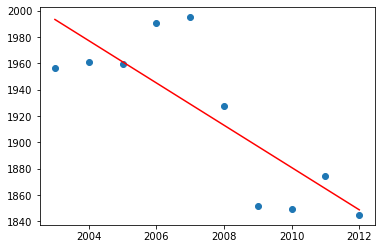

In [170]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [171]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.6514708333962784

In [172]:
all_act_2012_nonres_total_pops_slope = model.coef_
all_act_2012_nonres_total_pops_slope

array([[-16.05306405]])

#### 2003 -2019 Regression

In [173]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_total_pops_hpd, all_act_2004_nonres_total_pops_hpd, all_act_2005_nonres_total_pops_hpd,
                                   all_act_2006_nonres_total_pops_hpd, all_act_2007_nonres_total_pops_hpd, all_act_2008_nonres_total_pops_hpd,
                                   all_act_2009_nonres_total_pops_hpd, all_act_2010_nonres_total_pops_hpd, all_act_2011_nonres_total_pops_hpd,
                                   all_act_2012_nonres_total_pops_hpd, all_act_2013_nonres_total_pops_hpd, all_act_2014_nonres_total_pops_hpd,
                                   all_act_2015_nonres_total_pops_hpd, all_act_2016_nonres_total_pops_hpd, all_act_2017_nonres_total_pops_hpd,
                                   all_act_2018_nonres_total_pops_hpd, all_act_2019_nonres_total_pops_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

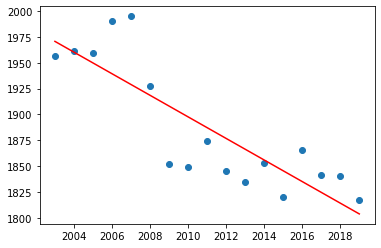

In [174]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [175]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.7142059520513442

In [176]:
all_act_2019_nonres_total_pops_slope = model.coef_
all_act_2019_nonres_total_pops_slope

array([[-10.43499791]])

## 2003-2019 Transportation - Total Population

### 2003 Transportation

In [177]:
#transporation = 12, 13. 12 = Car, truck, or motorcycle (driver), 13= Car, truck, or motorcycle (passager)

In [178]:
transpoartion_location = [12,13]
atus_multi_yr_tran_total_pops = multi_merged[multi_merged["TEWHERE"].isin(transpoartion_location)]
#atus_multi_yr_tran_total_pops

In [179]:
#atus transportation total_pops population seperated by year
atus_2003_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_tran_total_pops = atus_multi_yr_tran_total_pops[atus_multi_yr_tran_total_pops["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_tran_total_pops

In [180]:
atus_2003_tran_total_pops = atus_2003_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_tran_total_pops

In [181]:
atus_2003_tran_total_pops_merge = pd.merge(atus_2003_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_tran_total_pops_merge

In [182]:
atus_2003_tran_total_pops_merge["Multiplied Weight"] = atus_2003_tran_total_pops_merge["TUACTDUR24"] * atus_2003_tran_total_pops_merge["TUFNWGTP"]
#atus_2003_tran_total_pops_merge

In [183]:
atus_2003_tran_total_pops_multiplied_weight = atus_2003_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2003_tran_total_pops_multiplied_weight

5717341919254.443

In [184]:
atus_2003_tran_total_pops_hpd = atus_2003_tran_total_pops_multiplied_weight / atus_2003_total_pops_weight / 60
atus_2003_tran_total_pops_hpd

1.1587944006620414

### 2004 Transportation

In [185]:
atus_2004_tran_total_pops = atus_2004_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2004_tran_total_pops_merge = pd.merge(atus_2004_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_tran_total_pops_merge

In [186]:
atus_2004_tran_total_pops_merge["Multiplied Weight"] = atus_2004_tran_total_pops_merge["TUACTDUR24"] * atus_2004_tran_total_pops_merge["TUFNWGTP"]
atus_2004_tran_total_pops_multiplied_weight = atus_2004_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2004_tran_total_pops_multiplied_weight

5673218498697.803

In [187]:
atus_2004_tran_total_pops_hpd = atus_2004_tran_total_pops_multiplied_weight / atus_2004_total_pops_weight / 60
atus_2004_tran_total_pops_hpd

1.1356662717205104

### 2005 Transportation

In [188]:
atus_2005_tran_total_pops = atus_2005_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2005_tran_total_pops_merge = pd.merge(atus_2005_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_tran_total_pops_merge

In [189]:
atus_2005_tran_total_pops_merge["Multiplied Weight"] = atus_2005_tran_total_pops_merge["TUACTDUR24"] * atus_2005_tran_total_pops_merge["TUFNWGTP"]
atus_2005_tran_total_pops_multiplied_weight = atus_2005_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2005_tran_total_pops_multiplied_weight

5634155951834.113

In [190]:
atus_2005_tran_total_pops_hpd = atus_2005_tran_total_pops_multiplied_weight / atus_2005_total_pops_weight / 60
atus_2005_tran_total_pops_hpd

1.1164787830163392

### 2006 Transportation

In [191]:
atus_2006_tran_total_pops = atus_2006_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2006_tran_total_pops_merge = pd.merge(atus_2006_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_tran_total_pops_merge

In [192]:
atus_2006_tran_total_pops_merge["Multiplied Weight"] = atus_2006_tran_total_pops_merge["TUACTDUR24"] * atus_2006_tran_total_pops_merge["TUFNWGTP"]
atus_2006_tran_total_pops_multiplied_weight = atus_2006_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2006_tran_total_pops_multiplied_weight

5607869520303.845

In [193]:
atus_2006_tran_total_pops_hpd = atus_2006_tran_total_pops_multiplied_weight / atus_2006_total_pops_weight / 60
atus_2006_tran_total_pops_hpd

1.098423407756758

### 2007 Transportation

In [194]:
atus_2007_tran_total_pops = atus_2007_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2007_tran_total_pops_merge = pd.merge(atus_2007_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_tran_total_pops_merge

In [195]:
atus_2007_tran_total_pops_merge["Multiplied Weight"] = atus_2007_tran_total_pops_merge["TUACTDUR24"] * atus_2007_tran_total_pops_merge["TUFNWGTP"]
atus_2007_tran_total_pops_multiplied_weight = atus_2007_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2007_tran_total_pops_multiplied_weight

5679245909215.617

In [196]:
atus_2007_tran_total_pops_hpd = atus_2007_tran_total_pops_multiplied_weight / atus_2007_total_pops_weight / 60
atus_2007_tran_total_pops_hpd

1.098347916501255

### 2008 Transportation

In [197]:
atus_2008_tran_total_pops = atus_2008_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2008_tran_total_pops_merge = pd.merge(atus_2008_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_tran_total_pops_merge

In [198]:
atus_2008_tran_total_pops_merge["Multiplied Weight"] = atus_2008_tran_total_pops_merge["TUACTDUR24"] * atus_2008_tran_total_pops_merge["TUFNWGTP"]
atus_2008_tran_total_pops_multiplied_weight = atus_2008_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2008_tran_total_pops_multiplied_weight

5607525571088.577

In [199]:
atus_2008_tran_total_pops_hpd = atus_2008_tran_total_pops_multiplied_weight / atus_2008_total_pops_weight / 60
atus_2008_tran_total_pops_hpd

1.0728746446125197

### 2009 Transportation

In [200]:
atus_2009_tran_total_pops = atus_2009_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2009_tran_total_pops_merge = pd.merge(atus_2009_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_tran_total_pops_merge

In [201]:
atus_2009_tran_total_pops_merge["Multiplied Weight"] = atus_2009_tran_total_pops_merge["TUACTDUR24"] * atus_2009_tran_total_pops_merge["TUFNWGTP"]
atus_2009_tran_total_pops_multiplied_weight = atus_2009_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2009_tran_total_pops_multiplied_weight

5604002255015.193

In [202]:
atus_2009_tran_total_pops_hpd = atus_2009_tran_total_pops_multiplied_weight / atus_2009_total_pops_weight / 60
atus_2009_tran_total_pops_hpd

1.0666629630674613

### 2010 Transportation

In [203]:
atus_2010_tran_total_pops = atus_2010_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2010_tran_total_pops_merge = pd.merge(atus_2010_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_tran_total_pops_merge

In [204]:
atus_2010_tran_total_pops_merge["Multiplied Weight"] = atus_2010_tran_total_pops_merge["TUACTDUR24"] * atus_2010_tran_total_pops_merge["TUFNWGTP"]
atus_2010_tran_total_pops_multiplied_weight = atus_2010_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2010_tran_total_pops_multiplied_weight

5771087579960.709

In [205]:
atus_2010_tran_total_pops_hpd = atus_2010_tran_total_pops_multiplied_weight / atus_2010_total_pops_weight / 60
atus_2010_tran_total_pops_hpd

1.0893149913572848

### 2011 Transportation

In [206]:
atus_2011_tran_total_pops = atus_2011_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2011_tran_total_pops_merge = pd.merge(atus_2011_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_tran_total_pops_merge

In [207]:
atus_2011_tran_total_pops_merge["Multiplied Weight"] = atus_2011_tran_total_pops_merge["TUACTDUR24"] * atus_2011_tran_total_pops_merge["TUFNWGTP"]
atus_2011_tran_total_pops_multiplied_weight = atus_2011_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2011_tran_total_pops_multiplied_weight

5752226384092.098

In [208]:
atus_2011_tran_total_pops_hpd = atus_2011_tran_total_pops_multiplied_weight / atus_2011_total_pops_weight / 60
atus_2011_tran_total_pops_hpd

1.0780112538561926

### 2012 Transportation

In [209]:
atus_2012_tran_total_pops = atus_2012_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2012_tran_total_pops_merge = pd.merge(atus_2012_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_tran_total_pops_merge

In [210]:
atus_2012_tran_total_pops_merge["Multiplied Weight"] = atus_2012_tran_total_pops_merge["TUACTDUR24"] * atus_2012_tran_total_pops_merge["TUFNWGTP"]
atus_2012_tran_total_pops_multiplied_weight = atus_2012_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2012_tran_total_pops_multiplied_weight

5877370382478.939

In [211]:
atus_2012_tran_total_pops_hpd = atus_2012_tran_total_pops_multiplied_weight / atus_2012_total_pops_weight / 60
atus_2012_tran_total_pops_hpd

1.0818733835674883

### 2013 Transportation

In [212]:
atus_2013_tran_total_pops = atus_2013_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2013_tran_total_pops_merge = pd.merge(atus_2013_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_tran_total_pops_merge

In [213]:
atus_2013_tran_total_pops_merge["Multiplied Weight"] = atus_2013_tran_total_pops_merge["TUACTDUR24"] * atus_2013_tran_total_pops_merge["TUFNWGTP"]
atus_2013_tran_total_pops_multiplied_weight = atus_2013_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2013_tran_total_pops_multiplied_weight

5857819457260.153

In [214]:
atus_2013_tran_total_pops_hpd = atus_2013_tran_total_pops_multiplied_weight / atus_2013_total_pops_weight / 60
atus_2013_tran_total_pops_hpd

1.0707314877001795

### 2014 Transportation

In [215]:
atus_2014_tran_total_pops = atus_2014_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2014_tran_total_pops_merge = pd.merge(atus_2014_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_tran_total_pops_merge

In [216]:
atus_2014_tran_total_pops_merge["Multiplied Weight"] = atus_2014_tran_total_pops_merge["TUACTDUR24"] * atus_2014_tran_total_pops_merge["TUFNWGTP"]
atus_2014_tran_total_pops_multiplied_weight = atus_2014_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2014_tran_total_pops_multiplied_weight

5645778953683.627

In [217]:
atus_2014_tran_total_pops_hpd = atus_2014_tran_total_pops_multiplied_weight / atus_2014_total_pops_weight / 60
atus_2014_tran_total_pops_hpd

1.0226556876341628

### 2015 Transportation

In [218]:
atus_2015_tran_total_pops = atus_2015_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2015_tran_total_pops_merge = pd.merge(atus_2015_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_tran_total_pops_merge

In [219]:
atus_2015_tran_total_pops_merge["Multiplied Weight"] = atus_2015_tran_total_pops_merge["TUACTDUR24"] * atus_2015_tran_total_pops_merge["TUFNWGTP"]
atus_2015_tran_total_pops_multiplied_weight = atus_2015_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2015_tran_total_pops_multiplied_weight

5887348998090.09

In [220]:
atus_2015_tran_total_pops_hpd = atus_2015_tran_total_pops_multiplied_weight / atus_2015_total_pops_weight / 60
atus_2015_tran_total_pops_hpd

1.0541331920744552

### 2016 Transportation

In [221]:
atus_2016_tran_total_pops = atus_2016_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2016_tran_total_pops_merge = pd.merge(atus_2016_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_tran_total_pops_merge

In [222]:
atus_2016_tran_total_pops_merge["Multiplied Weight"] = atus_2016_tran_total_pops_merge["TUACTDUR24"] * atus_2016_tran_total_pops_merge["TUFNWGTP"]
atus_2016_tran_total_pops_multiplied_weight = atus_2016_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2016_tran_total_pops_multiplied_weight

6258021760167.602

In [223]:
atus_2016_tran_total_pops_hpd = atus_2016_tran_total_pops_multiplied_weight / atus_2016_total_pops_weight / 60
atus_2016_tran_total_pops_hpd

1.1056381238614204

### 2017 Transportation

In [224]:
atus_2017_tran_total_pops = atus_2017_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2017_tran_total_pops_merge = pd.merge(atus_2017_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_tran_total_pops_merge

In [225]:
atus_2017_tran_total_pops_merge["Multiplied Weight"] = atus_2017_tran_total_pops_merge["TUACTDUR24"] * atus_2017_tran_total_pops_merge["TUFNWGTP"]
atus_2017_tran_total_pops_multiplied_weight = atus_2017_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2017_tran_total_pops_multiplied_weight

6204756216004.254

In [226]:
atus_2017_tran_total_pops_hpd = atus_2017_tran_total_pops_multiplied_weight / atus_2017_total_pops_weight / 60
atus_2017_tran_total_pops_hpd

1.093046066584644

### 2018 Transportation

In [227]:
atus_2018_tran_total_pops = atus_2018_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2018_tran_total_pops_merge = pd.merge(atus_2018_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_tran_total_pops_merge

In [228]:
atus_2018_tran_total_pops_merge["Multiplied Weight"] = atus_2018_tran_total_pops_merge["TUACTDUR24"] * atus_2018_tran_total_pops_merge["TUFNWGTP"]
atus_2018_tran_total_pops_multiplied_weight = atus_2018_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2018_tran_total_pops_multiplied_weight

6198851907486.807

In [229]:
atus_2018_tran_total_pops_hpd = atus_2018_tran_total_pops_multiplied_weight / atus_2018_total_pops_weight / 60
atus_2018_tran_total_pops_hpd

1.080785250625469

### 2019 Transportation

In [230]:
atus_2019_tran_total_pops = atus_2019_tran_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2019_tran_total_pops_merge = pd.merge(atus_2019_tran_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_tran_total_pops_merge

In [231]:
atus_2019_tran_total_pops_merge["Multiplied Weight"] = atus_2019_tran_total_pops_merge["TUACTDUR24"] * atus_2019_tran_total_pops_merge["TUFNWGTP"]
atus_2019_tran_total_pops_multiplied_weight = atus_2019_tran_total_pops_merge["Multiplied Weight"].sum()
atus_2019_tran_total_pops_multiplied_weight

6340551393198.6875

In [232]:
atus_2019_tran_total_pops_hpd = atus_2019_tran_total_pops_multiplied_weight / atus_2019_total_pops_weight / 60
atus_2019_tran_total_pops_hpd

1.0993328315974409

### Regresssion: Transportation - Total Population

#### 2003 -2012 Regression

In [233]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_total_pops_hpd, atus_2004_tran_total_pops_hpd, atus_2005_tran_total_pops_hpd,
                                   atus_2006_tran_total_pops_hpd, atus_2007_tran_total_pops_hpd, atus_2008_tran_total_pops_hpd,
                                   atus_2009_tran_total_pops_hpd, atus_2010_tran_total_pops_hpd, atus_2011_tran_total_pops_hpd,
                                   atus_2012_tran_total_pops_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

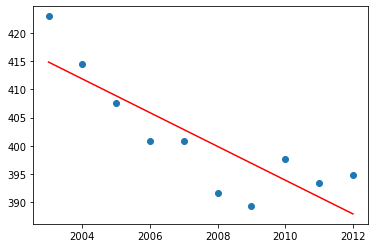

In [234]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [235]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.7126439327704555

In [236]:
tran_2012_total_pops_slope = model.coef_
tran_2012_total_pops_slope

array([[-2.99177856]])

#### 2003 -2019 Regression

In [237]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_total_pops_hpd, atus_2004_tran_total_pops_hpd, atus_2005_tran_total_pops_hpd,
                                   atus_2006_tran_total_pops_hpd, atus_2007_tran_total_pops_hpd, atus_2008_tran_total_pops_hpd,
                                   atus_2009_tran_total_pops_hpd, atus_2010_tran_total_pops_hpd, atus_2011_tran_total_pops_hpd,
                                   atus_2012_tran_total_pops_hpd, atus_2013_tran_total_pops_hpd, atus_2014_tran_total_pops_hpd,
                                   atus_2015_tran_total_pops_hpd, atus_2016_tran_total_pops_hpd, atus_2017_tran_total_pops_hpd,
                                   atus_2018_tran_total_pops_hpd, atus_2019_tran_total_pops_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

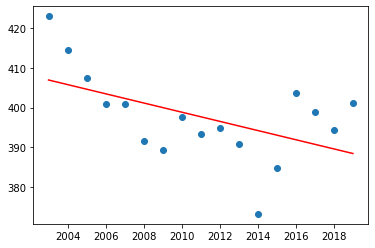

In [238]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [239]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.26666424843187275

In [240]:
tran_2019_total_pops_slope = model.coef_
tran_2019_total_pops_slope

array([[-1.1551201]])

## 2003-2019 - Unspecified- total_pops

In [241]:
#unspecified = 89, 89 = Unspecified place

In [242]:
unspecified_location = [89]
atus_multi_yr_unsp_total_pops = multi_merged[multi_merged["TEWHERE"].isin(unspecified_location)]
atus_multi_yr_unsp_total_pops

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TELFS,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR
373,20030100015941,15,905,04,0405,040507,89,1,1.423997e+06,18:50:00,19:05:00,2003
1237,20030101031030,129,510,13,1301,130131,89,1,2.080731e+06,10:21:00,12:30:00,2003
1315,20030101031047,4,232,03,0301,030112,89,1,3.792077e+06,07:48:00,07:52:00,2003
1324,20030101031047,5,672,03,0301,030111,89,1,3.792077e+06,15:07:00,15:12:00,2003
1325,20030101031047,1,673,03,0301,030112,89,1,3.792077e+06,15:12:00,15:13:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...
4119807,20191212191294,10,750,03,0301,030111,89,4,3.119249e+06,16:20:00,16:30:00,2019
4120048,20191212191450,41,448,04,0405,040508,89,5,2.445740e+06,10:47:00,11:28:00,2019
4120912,20191212191980,12,422,03,0305,030504,89,2,1.975811e+07,10:50:00,11:02:00,2019
4120914,20191212191980,10,437,03,0305,030504,89,2,1.975811e+07,11:07:00,11:17:00,2019


In [243]:
#atus transportation total_pops population seperated by year
#unsp = unspecified
atus_2003_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_unsp_total_pops = atus_multi_yr_unsp_total_pops[atus_multi_yr_unsp_total_pops["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_unsp_total_pops
#atus_2004_unsp_total_pops["TRCODEP"]

### 2003 Unspecified- total_pops

In [244]:
atus_2003_unsp_total_pops = atus_2003_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24",])
#atus_2003_unsp_total_pops

In [245]:
atus_2003_unsp_total_pops_merge = pd.merge(atus_2003_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_unsp_total_pops_merge

In [246]:
atus_2003_unsp_total_pops_merge["Multiplied Weight"] = atus_2003_unsp_total_pops_merge["TUACTDUR24"] * atus_2003_unsp_total_pops_merge["TUFNWGTP"]
#atus_2003_unsp_total_pops_merge

In [247]:
atus_2003_unsp_total_pops_multiplied_weight = atus_2003_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2003_unsp_total_pops_multiplied_weight

107661914278.52362

In [248]:
atus_2003_unsp_total_pops_hpd = atus_2003_unsp_total_pops_multiplied_weight / atus_2003_total_pops_weight / 60
atus_2003_unsp_total_pops_hpd

0.021820983455678757

### 2004 Unspecified- total_pops

In [249]:
atus_2004_unsp_total_pops = atus_2004_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_unsp_total_pops

In [250]:
atus_2004_unsp_total_pops_merge = pd.merge(atus_2004_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2004_unsp_total_pops_merge["Multiplied Weight"] = atus_2004_unsp_total_pops_merge["TUACTDUR24"] * atus_2004_unsp_total_pops_merge["TUFNWGTP"]

atus_2004_unsp_total_pops_multiplied_weight = atus_2004_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2004_unsp_total_pops_multiplied_weight

56578146262.73575

In [251]:
atus_2004_unsp_total_pops_hpd = atus_2004_unsp_total_pops_multiplied_weight / atus_2004_total_pops_weight / 60
atus_2004_unsp_total_pops_hpd

0.011325827207573145

### 2005 Unspecified- total_pops

In [252]:
atus_2005_unsp_total_pops = atus_2005_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_unsp_total_pops

In [253]:
atus_2005_unsp_total_pops_merge = pd.merge(atus_2005_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2005_unsp_total_pops_merge["Multiplied Weight"] = atus_2005_unsp_total_pops_merge["TUACTDUR24"] * atus_2005_unsp_total_pops_merge["TUFNWGTP"]

atus_2005_unsp_total_pops_multiplied_weight = atus_2005_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2005_unsp_total_pops_multiplied_weight

51324740058.55345

In [254]:
atus_2005_unsp_total_pops_hpd = atus_2005_unsp_total_pops_multiplied_weight / atus_2005_total_pops_weight / 60
atus_2005_unsp_total_pops_hpd

0.010170642028563232

### 2006 Unspecified- total_pops

In [255]:
atus_2006_unsp_total_pops = atus_2006_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_unsp_total_pops

In [256]:
atus_2006_unsp_total_pops_merge = pd.merge(atus_2006_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2006_unsp_total_pops_merge["Multiplied Weight"] = atus_2006_unsp_total_pops_merge["TUACTDUR24"] * atus_2006_unsp_total_pops_merge["TUFNWGTP"]

atus_2006_unsp_total_pops_multiplied_weight = atus_2006_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2006_unsp_total_pops_multiplied_weight

67299605218.01517

In [257]:
atus_2006_unsp_total_pops_hpd = atus_2006_unsp_total_pops_multiplied_weight / atus_2006_total_pops_weight / 60
atus_2006_unsp_total_pops_hpd

0.013182093741056123

### 2007 Unspecified- total_pops

In [258]:
atus_2007_unsp_total_pops = atus_2007_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_unsp_total_pops

In [259]:
atus_2007_unsp_total_pops_merge = pd.merge(atus_2007_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2007_unsp_total_pops_merge["Multiplied Weight"] = atus_2007_unsp_total_pops_merge["TUACTDUR24"] * atus_2007_unsp_total_pops_merge["TUFNWGTP"]

atus_2007_unsp_total_pops_multiplied_weight = atus_2007_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2007_unsp_total_pops_multiplied_weight

89702803091.01132

In [260]:
atus_2007_unsp_total_pops_hpd = atus_2007_unsp_total_pops_multiplied_weight / atus_2007_total_pops_weight / 60
atus_2007_unsp_total_pops_hpd

0.01734823398287085

### 2008 Unspecified- total_pops

In [261]:
atus_2008_unsp_total_pops = atus_2008_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_unsp_total_pops

In [262]:
atus_2008_unsp_total_pops_merge = pd.merge(atus_2008_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2008_unsp_total_pops_merge["Multiplied Weight"] = atus_2008_unsp_total_pops_merge["TUACTDUR24"] * atus_2008_unsp_total_pops_merge["TUFNWGTP"]

atus_2008_unsp_total_pops_multiplied_weight = atus_2008_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2008_unsp_total_pops_multiplied_weight

86345951561.34996

In [263]:
atus_2008_unsp_total_pops_hpd = atus_2008_unsp_total_pops_multiplied_weight / atus_2008_total_pops_weight / 60
atus_2008_unsp_total_pops_hpd

0.0165203673029581

### 2009 Unspecified- total_pops

In [264]:
atus_2009_unsp_total_pops = atus_2009_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_unsp_total_pops

In [265]:
atus_2009_unsp_total_pops_merge = pd.merge(atus_2009_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2009_unsp_total_pops_merge["Multiplied Weight"] = atus_2009_unsp_total_pops_merge["TUACTDUR24"] * atus_2009_unsp_total_pops_merge["TUFNWGTP"]

atus_2009_unsp_total_pops_multiplied_weight = atus_2009_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2009_unsp_total_pops_multiplied_weight

78365184552.22073

In [266]:
atus_2009_unsp_total_pops_hpd = atus_2009_unsp_total_pops_multiplied_weight / atus_2009_total_pops_weight / 60
atus_2009_unsp_total_pops_hpd

0.01491598970735489

### 2010 Unspecified- total_pops

In [267]:
atus_2010_unsp_total_pops = atus_2010_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_unsp_total_pops

In [268]:
atus_2010_unsp_total_pops_merge = pd.merge(atus_2010_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2010_unsp_total_pops_merge["Multiplied Weight"] = atus_2010_unsp_total_pops_merge["TUACTDUR24"] * atus_2010_unsp_total_pops_merge["TUFNWGTP"]

atus_2010_unsp_total_pops_multiplied_weight = atus_2010_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2010_unsp_total_pops_multiplied_weight

97899426254.09967

In [269]:
atus_2010_unsp_total_pops_hpd = atus_2010_unsp_total_pops_multiplied_weight / atus_2010_total_pops_weight / 60
atus_2010_unsp_total_pops_hpd

0.018478893481736723

### 2011 Unspecified- total_pops

In [270]:
atus_2011_unsp_total_pops = atus_2011_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_unsp_total_pops

In [271]:
atus_2011_unsp_total_pops_merge = pd.merge(atus_2011_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2011_unsp_total_pops_merge["Multiplied Weight"] = atus_2011_unsp_total_pops_merge["TUACTDUR24"] * atus_2011_unsp_total_pops_merge["TUFNWGTP"]

atus_2011_unsp_total_pops_multiplied_weight = atus_2011_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2011_unsp_total_pops_multiplied_weight

91438301580.85043

In [272]:
atus_2011_unsp_total_pops_hpd = atus_2011_unsp_total_pops_multiplied_weight / atus_2011_total_pops_weight / 60
atus_2011_unsp_total_pops_hpd

0.017136237615796007

### 2012 Unspecified- total_pops

In [273]:
atus_2012_unsp_total_pops = atus_2012_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_unsp_total_pops

In [274]:
atus_2012_unsp_total_pops_merge = pd.merge(atus_2012_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2012_unsp_total_pops_merge["Multiplied Weight"] = atus_2012_unsp_total_pops_merge["TUACTDUR24"] * atus_2012_unsp_total_pops_merge["TUFNWGTP"]

atus_2012_unsp_total_pops_multiplied_weight = atus_2012_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2012_unsp_total_pops_multiplied_weight

80645527301.76378

In [275]:
atus_2012_unsp_total_pops_hpd = atus_2012_unsp_total_pops_multiplied_weight / atus_2012_total_pops_weight / 60
atus_2012_unsp_total_pops_hpd

0.014844776458471914

### 2013 Unspecified- total_pops

In [276]:
atus_2013_unsp_total_pops = atus_2013_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_unsp_total_pops

In [277]:
atus_2013_unsp_total_pops_merge = pd.merge(atus_2013_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2013_unsp_total_pops_merge["Multiplied Weight"] = atus_2013_unsp_total_pops_merge["TUACTDUR24"] * atus_2013_unsp_total_pops_merge["TUFNWGTP"]

atus_2013_unsp_total_pops_multiplied_weight = atus_2013_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2013_unsp_total_pops_multiplied_weight

59320905800.25142

In [278]:
atus_2013_unsp_total_pops_hpd = atus_2013_unsp_total_pops_multiplied_weight / atus_2013_total_pops_weight / 60
atus_2013_unsp_total_pops_hpd

0.010843072611345685

### 2014 Unspecified- total_pops

In [279]:
atus_2014_unsp_total_pops = atus_2014_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_unsp_total_pops

In [280]:
atus_2014_unsp_total_pops_merge = pd.merge(atus_2014_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2014_unsp_total_pops_merge["Multiplied Weight"] = atus_2014_unsp_total_pops_merge["TUACTDUR24"] * atus_2014_unsp_total_pops_merge["TUFNWGTP"]

atus_2014_unsp_total_pops_multiplied_weight = atus_2014_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2014_unsp_total_pops_multiplied_weight

74266238036.55905

In [281]:
atus_2014_unsp_total_pops_hpd = atus_2014_unsp_total_pops_multiplied_weight / atus_2014_total_pops_weight / 60
atus_2014_unsp_total_pops_hpd

0.013452313905723571

### 2015 Unspecified- total_pops

In [282]:
atus_2015_unsp_total_pops = atus_2015_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_unsp_total_pops

In [283]:
atus_2015_unsp_total_pops_merge = pd.merge(atus_2015_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2015_unsp_total_pops_merge["Multiplied Weight"] = atus_2015_unsp_total_pops_merge["TUACTDUR24"] * atus_2015_unsp_total_pops_merge["TUFNWGTP"]

atus_2015_unsp_total_pops_multiplied_weight = atus_2015_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2015_unsp_total_pops_multiplied_weight

69170608126.13742

In [284]:
atus_2015_unsp_total_pops_hpd = atus_2015_unsp_total_pops_multiplied_weight / atus_2015_total_pops_weight / 60
atus_2015_unsp_total_pops_hpd

0.01238503679081889

### 2016 Unspecified- total_pops

In [285]:
atus_2016_unsp_total_pops = atus_2016_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_unsp_total_pops

In [286]:
atus_2016_unsp_total_pops_merge = pd.merge(atus_2016_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2016_unsp_total_pops_merge["Multiplied Weight"] = atus_2016_unsp_total_pops_merge["TUACTDUR24"] * atus_2016_unsp_total_pops_merge["TUFNWGTP"]

atus_2016_unsp_total_pops_multiplied_weight = atus_2016_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2016_unsp_total_pops_multiplied_weight

120451157061.3049

In [287]:
atus_2016_unsp_total_pops_hpd = atus_2016_unsp_total_pops_multiplied_weight / atus_2016_total_pops_weight / 60
atus_2016_unsp_total_pops_hpd

0.02128074915908118

### 2017 Unspecified- total_pops

In [288]:
atus_2017_unsp_total_pops = atus_2017_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_unsp_total_pops

In [289]:
atus_2017_unsp_total_pops_merge = pd.merge(atus_2017_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2017_unsp_total_pops_merge["Multiplied Weight"] = atus_2017_unsp_total_pops_merge["TUACTDUR24"] * atus_2017_unsp_total_pops_merge["TUFNWGTP"]

atus_2017_unsp_total_pops_multiplied_weight = atus_2017_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2017_unsp_total_pops_multiplied_weight

103262753966.27536

In [290]:
atus_2017_unsp_total_pops_hpd = atus_2017_unsp_total_pops_multiplied_weight / atus_2017_total_pops_weight / 60
atus_2017_unsp_total_pops_hpd

0.018191036540066017

### 2018 Unspecified- total_pops

In [291]:
atus_2018_unsp_total_pops = atus_2018_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_unsp_total_pops

In [292]:
atus_2018_unsp_total_pops_merge = pd.merge(atus_2018_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2018_unsp_total_pops_merge["Multiplied Weight"] = atus_2018_unsp_total_pops_merge["TUACTDUR24"] * atus_2018_unsp_total_pops_merge["TUFNWGTP"]

atus_2018_unsp_total_pops_multiplied_weight = atus_2018_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2018_unsp_total_pops_multiplied_weight

96906680835.47786

In [293]:
atus_2018_unsp_total_pops_hpd = atus_2018_unsp_total_pops_multiplied_weight / atus_2018_total_pops_weight / 60
atus_2018_unsp_total_pops_hpd

0.01689592087327619

### 2019 Unspecified- total_pops

In [294]:
atus_2019_unsp_total_pops = atus_2019_unsp_total_pops.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_unsp_total_pops

In [295]:
atus_2019_unsp_total_pops_merge = pd.merge(atus_2019_unsp_total_pops, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2019_unsp_total_pops_merge["Multiplied Weight"] = atus_2019_unsp_total_pops_merge["TUACTDUR24"] * atus_2019_unsp_total_pops_merge["TUFNWGTP"]

atus_2019_unsp_total_pops_multiplied_weight = atus_2019_unsp_total_pops_merge["Multiplied Weight"].sum()
atus_2019_unsp_total_pops_multiplied_weight

78051808613.3258

In [296]:
atus_2019_unsp_total_pops_hpd = atus_2019_unsp_total_pops_multiplied_weight / atus_2019_total_pops_weight / 60
atus_2019_unsp_total_pops_hpd

0.013532721439058006

### Regresssion: Unespecified - total_pops

#### 2003 -2012 Regression

In [297]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_total_pops_hpd, atus_2004_unsp_total_pops_hpd, atus_2005_unsp_total_pops_hpd,
                                   atus_2006_unsp_total_pops_hpd, atus_2007_unsp_total_pops_hpd, atus_2008_unsp_total_pops_hpd,
                                   atus_2009_unsp_total_pops_hpd, atus_2010_unsp_total_pops_hpd, atus_2011_unsp_total_pops_hpd,
                                   atus_2012_unsp_total_pops_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

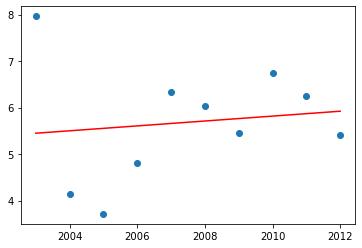

In [298]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [299]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.015914362951729655

In [300]:
all_act_2012_res_total_pops_slope = model.coef_
all_act_2012_res_total_pops_slope

array([[0.0526531]])

#### 2003-2019 Regression

In [301]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_total_pops_hpd, atus_2004_unsp_total_pops_hpd, atus_2005_unsp_total_pops_hpd,
                                   atus_2006_unsp_total_pops_hpd, atus_2007_unsp_total_pops_hpd, atus_2008_unsp_total_pops_hpd,
                                   atus_2009_unsp_total_pops_hpd, atus_2010_unsp_total_pops_hpd, atus_2011_unsp_total_pops_hpd,
                                   atus_2012_unsp_total_pops_hpd, atus_2013_unsp_total_pops_hpd, atus_2014_unsp_total_pops_hpd,
                                   atus_2015_unsp_total_pops_hpd, atus_2016_unsp_total_pops_hpd, atus_2017_unsp_total_pops_hpd,
                                   atus_2018_unsp_total_pops_hpd, atus_2019_unsp_total_pops_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

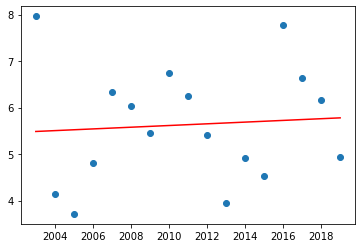

In [302]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [303]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.005404317384358426

In [304]:
all_act_2019_res_total_pops_slope = model.coef_
all_act_2019_res_total_pops_slope

array([[0.01830663]])